In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.io import fits
from astropy.table import Table
from prfr import ProbabilisticRandomForestRegressor, split_arrays

plt.rcParams["axes.labelsize"] = 25
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["figure.figsize"] = (11, 7)

In [2]:
data = Table.read("../data/bprp_apogee.fits").to_pandas().dropna()

In [3]:
data_ages = fits.open("../data/apogee_astroNN-DR17.fits.1")[1].data

In [4]:
cols = [
    "TEFF",
    "TEFF_ERR",
    "LOGG",
    "LOGG_ERR",
    "C_H",
    "C_H_ERR",
    "CI_H",
    "CI_H_ERR",
    "N_H",
    "N_H_ERR",
    "O_H",
    "O_H_ERR",
    "NA_H",
    "NA_H_ERR",
    "MG_H",
    "MG_H_ERR",
    "AL_H",
    "AL_H_ERR",
    "SI_H",
    "SI_H_ERR",
    "P_H",
    "P_H_ERR",
    "S_H",
    "S_H_ERR",
    "K_H",
    "K_H_ERR",
    "CA_H",
    "CA_H_ERR",
    "TI_H",
    "TI_H_ERR",
    "TIII_H",
    "TIII_H_ERR",
    "V_H",
    "V_H_ERR",
    "CR_H",
    "CR_H_ERR",
    "MN_H",
    "MN_H_ERR",
    "FE_H",
    "FE_H_ERR",
    "CO_H",
    "CO_H_ERR",
    "NI_H",
    "NI_H_ERR",
    "age",
    "age_total_error",
]

df_ages = pd.DataFrame(
    np.stack(
        (
            data_ages["source_id"],
            *[data_ages[i].astype("float32") for i in cols],
        )
    ).T
)
df_ages.columns = ["source_id"] + cols

In [5]:
data = data.drop(["fe_h", "alpha_m", "logg", "teff", "m_h"], axis=1)
data = pd.merge(
    data.drop_duplicates(), df_ages.drop_duplicates(), on="source_id"
).dropna()
data = data[data["LOGG"] < 3.5]
data = data[data["LOGG_ERR"] < 0.12]
data = data[(data["age_total_error"] / data["age"]) < 0.3]
data = data[
    (data["sfd_ebv"] < 0.1) & (data["FE_H"] > -5.0)
]  # consider cuts on other parameters?

In [6]:
names_X = [
    "bp_1",
    "bp_2",
    "bp_3",
    "bp_4",
    "bp_5",
    "bp_6",
    "bp_7",
    "bp_8",
    "bp_9",
    "bp_10",
    "bp_11",
    "bp_12",
    "bp_13",
    "bp_14",
    "bp_15",
    "bp_16",
    "bp_17",
    "bp_18",
    "bp_19",
    "bp_20",
    "bp_21",
    "bp_22",
    "bp_23",
    "bp_24",
    "bp_25",
    "bp_26",
    "bp_27",
    "bp_28",
    "bp_29",
    "bp_30",
    "bp_31",
    "bp_32",
    "bp_33",
    "bp_34",
    "bp_35",
    "bp_36",
    "bp_37",
    "bp_38",
    "bp_39",
    "bp_40",
    "bp_41",
    "bp_42",
    "bp_43",
    "bp_44",
    "bp_45",
    "bp_46",
    "bp_47",
    "bp_48",
    "bp_49",
    "bp_50",
    "bp_51",
    "bp_52",
    "bp_53",
    "bp_54",
    "bp_55",
    "rp_1",
    "rp_2",
    "rp_3",
    "rp_4",
    "rp_5",
    "rp_6",
    "rp_7",
    "rp_8",
    "rp_9",
    "rp_10",
    "rp_11",
    "rp_12",
    "rp_13",
    "rp_14",
    "rp_15",
    "rp_16",
    "rp_17",
    "rp_18",
    "rp_19",
    "rp_20",
    "rp_21",
    "rp_22",
    "rp_23",
    "rp_24",
    "rp_25",
    "rp_26",
    "rp_27",
    "rp_28",
    "rp_29",
    "rp_30",
    "rp_31",
    "rp_32",
    "rp_33",
    "rp_34",
    "rp_35",
    "rp_36",
    "rp_37",
    "rp_38",
    "rp_39",
    "rp_40",
    "rp_41",
    "rp_42",
    "rp_43",
    "rp_44",
    "rp_45",
    "rp_46",
    "rp_47",
    "rp_48",
    "rp_49",
    "rp_50",
    "rp_51",
    "rp_52",
    "rp_53",
    "rp_54",
    "rp_55",
]
names_eX = [
    "bpe_1",
    "bpe_2",
    "bpe_3",
    "bpe_4",
    "bpe_5",
    "bpe_6",
    "bpe_7",
    "bpe_8",
    "bpe_9",
    "bpe_10",
    "bpe_11",
    "bpe_12",
    "bpe_13",
    "bpe_14",
    "bpe_15",
    "bpe_16",
    "bpe_17",
    "bpe_18",
    "bpe_19",
    "bpe_20",
    "bpe_21",
    "bpe_22",
    "bpe_23",
    "bpe_24",
    "bpe_25",
    "bpe_26",
    "bpe_27",
    "bpe_28",
    "bpe_29",
    "bpe_30",
    "bpe_31",
    "bpe_32",
    "bpe_33",
    "bpe_34",
    "bpe_35",
    "bpe_36",
    "bpe_37",
    "bpe_38",
    "bpe_39",
    "bpe_40",
    "bpe_41",
    "bpe_42",
    "bpe_43",
    "bpe_44",
    "bpe_45",
    "bpe_46",
    "bpe_47",
    "bpe_48",
    "bpe_49",
    "bpe_50",
    "bpe_51",
    "bpe_52",
    "bpe_53",
    "bpe_54",
    "bpe_55",
    "rpe_1",
    "rpe_2",
    "rpe_3",
    "rpe_4",
    "rpe_5",
    "rpe_6",
    "rpe_7",
    "rpe_8",
    "rpe_9",
    "rpe_10",
    "rpe_11",
    "rpe_12",
    "rpe_13",
    "rpe_14",
    "rpe_15",
    "rpe_16",
    "rpe_17",
    "rpe_18",
    "rpe_19",
    "rpe_20",
    "rpe_21",
    "rpe_22",
    "rpe_23",
    "rpe_24",
    "rpe_25",
    "rpe_26",
    "rpe_27",
    "rpe_28",
    "rpe_29",
    "rpe_30",
    "rpe_31",
    "rpe_32",
    "rpe_33",
    "rpe_34",
    "rpe_35",
    "rpe_36",
    "rpe_37",
    "rpe_38",
    "rpe_39",
    "rpe_40",
    "rpe_41",
    "rpe_42",
    "rpe_43",
    "rpe_44",
    "rpe_45",
    "rpe_46",
    "rpe_47",
    "rpe_48",
    "rpe_49",
    "rpe_50",
    "rpe_51",
    "rpe_52",
    "rpe_53",
    "rpe_54",
    "rpe_55",
]
names_Y = ["FE_H", "MG_H", "LOGG", "TEFF", "age"]
# names_Y = ["alpha_m"]
names_norm = ["gaiaedr3_phot_g_mean_mag"]

In [7]:
normalize = lambda x, n: x / (10 ** (8.5 - n / 2.5))

In [8]:
features = normalize(data[names_X].to_numpy(), data[names_norm].to_numpy())
efeatures = normalize(data[names_eX].to_numpy(), data[names_norm].to_numpy())
labels = data[names_Y].to_numpy()
labels[:, -1] = np.log(labels[:, -1])  # log ages
labels[:, 1] = labels[:, 1] - labels[:, 0]  # turn mg/h into mg/fe

train, test, valid = split_arrays(
    features,
    efeatures,
    labels,
    test_size=0.2,
    valid_size=0.2,
)

In [9]:
model = ProbabilisticRandomForestRegressor(
    n_jobs=-1,
)

In [10]:
model.fit(
    train[0],
    train[2],
    eX=train[1],
)

  0%|          | 0/100 [00:00<?, ?it/s]

ProbabilisticRandomForestRegressor(n_jobs=-1)

In [11]:
model.calibrate(valid[0], valid[2], eX=valid[1], apply_bias=False)
model.fit_bias(valid[0], valid[2], eX=valid[1])

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
preds = model.predict(test[0], eX=test[1])
residual = test[2] - np.mean(preds, axis=-1)
print(residual.mean(axis=0), residual.std(axis=0))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

[0.00119426 0.00034132 0.00240244 0.00473826 0.00363322] [ 0.05950764  0.04235211  0.11904478 41.45411969  0.17245322]


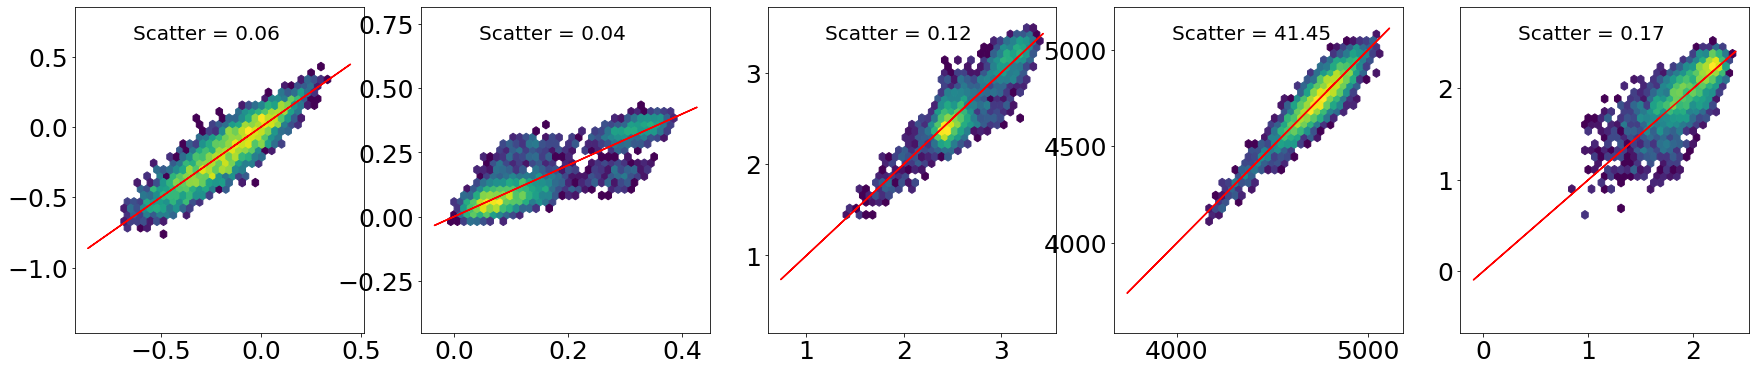

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(30, 6))
for i in range(5):
    ax[i].hexbin(
        test[2][:, i],
        preds[:, i, 0],
        gridsize=40,
        mincnt=5,
        norm=matplotlib.colors.LogNorm(),
    )
    ax[i].plot(test[2][:, i], test[2][:, i], c="r", zorder=5)
    ax[i].annotate(
        f"Scatter = {residual.std(axis=0)[i]:.2f}",
        (0.2, 0.9),
        xycoords="axes fraction",
        fontsize=20,
    )

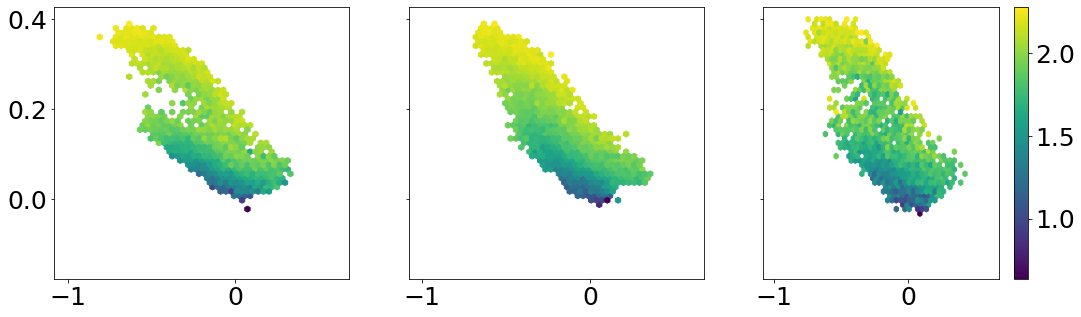

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True, sharex=True)
args = dict(gridsize=50, mincnt=2, extent=[-1.0, 0.6, -0.15, 0.4])
ax[0].hexbin(test[2][:, 0], test[2][:, 1], C=test[2][:, 4], **args)
ax[1].hexbin(
    preds[:, 0].mean(axis=-1),
    preds[:, 1].mean(axis=-1),
    C=preds[:, 4].mean(axis=-1),
    **args
)
hb = ax[2].hexbin(preds[:, 0, 0], preds[:, 1, 0], C=preds[:, 4].mean(axis=-1), **args)
plt.colorbar(hb, ax=ax[2])

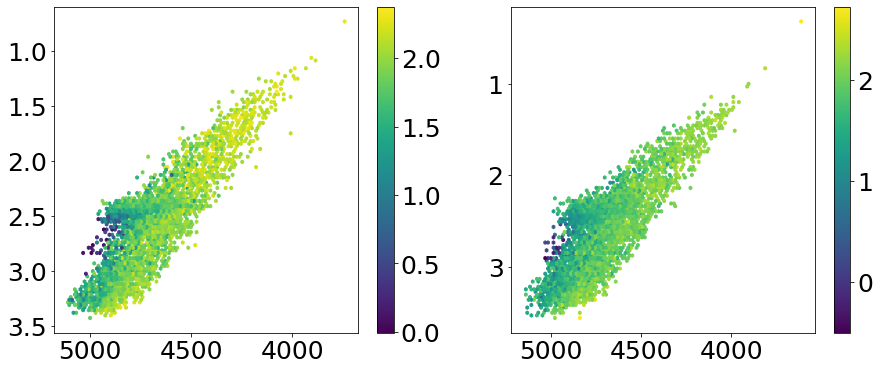

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

hb0 = ax[0].hexbin(test[2][:, 3], test[2][:, 2], C=test[2][:, -1])
plt.colorbar(hb0, ax=ax[0])
hb1 = ax[1].hexbin(preds[:, 3, 0], preds[:, 2, 0], C=preds[:, -1, 0])
plt.colorbar(hb1, ax=ax[1])

for a in ax:
    a.invert_xaxis()
    a.invert_yaxis()